In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def find_closest_centroids(X, centroids):
    distances = np.linalg.norm(X[:, np.newaxis, :] - centroids[np.newaxis, :, :], axis=2)
    idx = np.argmin(distances, axis=1)
    return idx


In [5]:
def compute_centroids(X, idx, K):
    centroids = np.array([X[idx == k].mean(axis=0) for k in range(K)])
    return centroids


In [6]:
img = plt.imread('bird_small.png')

In [7]:
print(img.shape)
img = img[:, :, :3]   # keep only RGB
X_img = img.reshape(-1, 3)

(983, 992, 4)


In [8]:
original_shape = img.shape
X_img = img.reshape(-1,3)

K = 22
max_iters = 10
initial_centroids = X_img[np.random.choice(X_img.shape[0], K, replace=False)]

In [9]:
# Running k-means
centroids = initial_centroids
for i in range(max_iters):
    print(f"K-Means iteration {i}/{max_iters}")
    idx = find_closest_centroids(X_img,centroids)
    centroids = compute_centroids(X_img, idx, K)

K-Means iteration 0/10
K-Means iteration 1/10
K-Means iteration 2/10
K-Means iteration 3/10
K-Means iteration 4/10
K-Means iteration 5/10
K-Means iteration 6/10
K-Means iteration 7/10
K-Means iteration 8/10
K-Means iteration 9/10


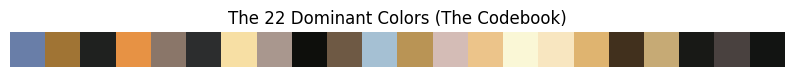

In [11]:
def plot_palette(centroids):
    # Centroids are the colors. Sort them by brightness or hue for better visualization
    palette = centroids.reshape(1, -1, 3)
    plt.figure(figsize=(10, 2))
    plt.imshow(palette)
    plt.axis('off')
    plt.title(f"The {K} Dominant Colors (The Codebook)")
    plt.show()
plot_palette(centroids)

In [12]:
X_recovered = centroids[idx, : ]
X_recovered = X_recovered.reshape(original_shape)

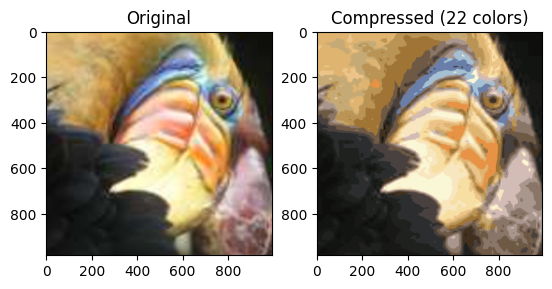

In [21]:
# 6. Display Result
plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(img)

plt.subplot(1, 2, 2)
plt.title(f"Compressed ({K} colors)")
plt.imshow(X_recovered)
plt.show()

In [15]:
def calculate_compression_stats(img, K):
    rows, cols, channels = img.shape
    num_pixels = rows * cols
    
    original_size_bits = num_pixels * 3 * 8
    
    bits_per_index = np.ceil(np.log2(K))
    pixel_indices_bits = num_pixels * bits_per_index
    
    centroid_table_bits = K * 24
    
    compressed_size_bits = pixel_indices_bits + centroid_table_bits
    
    # Percentage calculation
    reduction = 100 * (1 - compressed_size_bits / original_size_bits)
    
    print(f"--- Compression Check ---")
    print(f"Original Size:   {original_size_bits:,} bits")
    print(f"Compressed Size: {int(compressed_size_bits):,} bits")
    print(f"Space Saved:     {reduction:.2f}%")
    print(f"Compression Ratio: {original_size_bits / compressed_size_bits:.2f}:1")

calculate_compression_stats(img, K)

--- Compression Check ---
Original Size:   23,403,264 bits
Compressed Size: 4,876,208 bits
Space Saved:     79.16%
Compression Ratio: 4.80:1
